# Import Data & Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('D:/insurance.csv', encoding='utf-8')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows with 7 variables, consist of 4 numeric variables and 3 categoric variables.

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

# Descriptive Statistic

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on overall data:
- Mean of age is 39.21
- Mean of BMI is 30.66
- Mean of children or number dependents is 1.1
- Mean of charges or medical costs personal is 13270.42

In [6]:
df_smoker = df[(df["smoker"] == "yes")]
print("Mean of BMI (smoker):", df_smoker["bmi"].mean())

Mean of BMI (smoker): 30.708448905109503


Ideally, BMI range is between 18.5 to 24.9. But, the data shows average BMI of smoker is 30.71, which is so high.

In [7]:
df_non_smoker = df[(df["smoker"] == "no")]
print("Mean of BMI (non smoker):", df_non_smoker["bmi"].mean())

Mean of BMI (non smoker): 30.651795112781922


But, mean of BMI for non smoker is also high.

In [8]:
df_female_smoker = df[(df["sex"] == "female") & (df["smoker"] == "yes")]
df_male_smoker = df[(df["sex"] == "male") & (df["smoker"] == "yes")]

x = df_female_smoker['age'].mean()
y = df_male_smoker['age'].mean()

print("Mean of female smoker age:", x)
print("Mean of male smoker age:", y)

print ("Is it same?", x == y)

Mean of female smoker age: 38.608695652173914
Mean of male smoker age: 38.44654088050314
Is it same? False


In [9]:
charge_smoker = df_smoker['charges'].mean()
charge_non_smoker = df_non_smoker['charges'].mean()

print("Mean of smoker charges:", charge_smoker)
print("Mean of non smoker charges:", charge_non_smoker)

Mean of smoker charges: 32050.23183153285
Mean of non smoker charges: 8434.268297856199


In [10]:
df_smoker_bmi = df_smoker[(df_smoker["bmi"]) > 25]
df_non_smoker_bmi = df_non_smoker[(df_non_smoker["bmi"]) > 25]

charge_smoker_bmi = df_smoker_bmi['charges'].mean()
charge_non_smoker_bmi = df_non_smoker_bmi['charges'].mean()

print("Mean of smoker charge (BMI > 25):", charge_smoker_bmi)
print("Mean of non smoker charge (BMI > 25):", charge_non_smoker_bmi)

Mean of smoker charge (BMI > 25): 35116.90965694065
Mean of non smoker charge (BMI > 25): 8629.589609712148


# Categoric Variables

In [11]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
p1 = len(df[df["region"]=='southeast'])/len(df)
p2 = len(df[df["region"]=='southwest'])/len(df)
p3 = len(df[df["region"]=='northwest'])/len(df)
p4 = len(df[df["region"]=='northeast'])/len(df)

print("Proportion of region 1 (southeast):",p1)
print("Proportion of region 2 (southwest):",p2)
print("Proportion of region 3 (northwest):",p3)
print("Proportion of region 4 (northeast):",p4)

Proportion of region 1 (southeast): 0.27204783258594917
Proportion of region 2 (southwest): 0.2428998505231689
Proportion of region 3 (northwest): 0.2428998505231689
Proportion of region 4 (northeast): 0.242152466367713


In [13]:
p_smoker = len(df[df["smoker"]=='yes'])/len(df)
p_non_smoker = len(df[df["smoker"]=='no'])/len(df)

print("Proportion of smoker:",p_smoker)
print("Proportion of non smoker:",p_non_smoker)

Proportion of smoker: 0.20478325859491778
Proportion of non smoker: 0.7952167414050823


In [14]:
(df[df["smoker"]=='no'])

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [15]:
n_smoker = len(df[df["smoker"]=='yes'])
n_female_and_smoker = len(df[(df["smoker"]=='yes') & (df["sex"]=='female')])

prob = n_female_and_smoker / n_smoker
print("P (female | smoker):", round(prob,2))

P (female | smoker): 0.42


In [16]:
n_male_and_smoker = len(df[(df["smoker"]=='yes') & (df["sex"]=='male')])

prob1 = n_male_and_smoker / n_smoker
print("P (male | smoker):", round(prob1,2))

P (male | smoker): 0.58


In [17]:
def expected_value(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()

In [18]:
df_female = df[(df["sex"] == "female")]
df_male = df[(df["sex"] == "male")]

In [19]:
df_female_prob = pd.DataFrame(df_female.groupby('charges')['charges'].agg('count'))
df_female_prob = df_female_prob.rename(columns={"charges":"count"})
df_female_prob["count"].unique()

array([1], dtype=int64)

In [20]:
df_female_prob["charges"] = df_female_prob.index
df_female_prob["prob"] = df_female_prob["count"]/1338

x_female = df_female_prob["charges"]
probs  = df_female_prob["prob"]

#calculate expected value
print("Expectation of charges for female:", expected_value(x_female, probs))

Expectation of charges for female: 12569.57884383535


In [21]:
df_male_prob = pd.DataFrame(df_male.groupby('charges')['charges'].agg('count'))
df_male_prob = df_male_prob.rename(columns={"charges":"count"})
df_male_prob["count"].unique()

array([1, 2], dtype=int64)

In [22]:
df_male_prob["charges"] = df_male_prob.index
df_male_prob["prob"] = df_male_prob["count"]/1338

x_male = df_male_prob["charges"]
probs_1  = df_male_prob["prob"]

#calculate expected value
print("Expectation of charges for male:", expected_value(x_male, probs_1))

Expectation of charges for male: 13956.751177721893


Gender of male has an expectation value of charges which higher than female

# Continuous Variables 

In [23]:
bmi_above= df[df["bmi"] > 25]
bmi_less= df[df["bmi"] < 25]

c1 = bmi_above[bmi_above["charges"] > 16700]
c2 = bmi_less[bmi_less["charges"] > 16700]

C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


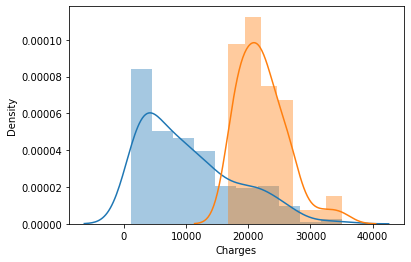

In [24]:
fig = sns.distplot(bmi_less['charges'], axlabel='Charges', kde=True)
fig = sns.distplot(c2['charges'], axlabel='Charges', kde=True)
plt.show()

C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


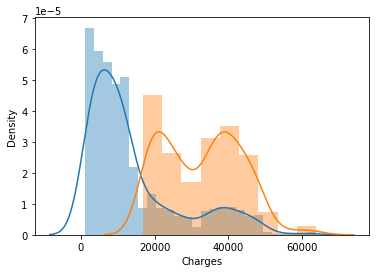

In [25]:
fig = sns.distplot(bmi_above['charges'], axlabel='Charges', kde=True)
fig = sns.distplot(c1['charges'], axlabel='Charges', kde=True)
plt.show()

In [26]:
proportion1 = len(c1)/len(bmi_above)
proportion2 = len(c2)/len(bmi_less)

print("Proportion of person who has BMI more than 25 to have charges up to 16.7K:", proportion1)
print("Proportion of person who has BMI less than 25 to have charges up to 16.7K :", proportion2)


Proportion of person who has BMI more than 25 to have charges up to 16.7K: 0.25939505041246563
Proportion of person who has BMI less than 25 to have charges up to 16.7K : 0.20816326530612245


In [27]:
c3 = df_smoker_bmi[df_smoker_bmi["charges"] > 16700]
c4 = df_non_smoker_bmi[df_non_smoker_bmi["charges"] > 16700]

proportion3 = len(c3)/len(df_smoker_bmi)
proportion4 = len(c4)/len(df_non_smoker_bmi)

print("Proportion of smoker who has BMI more than 25 to have charges up to 16.7K:", proportion3)
print("Proportion of non smoker who has BMI more than 25 to have charges up to 16.7K :", proportion4)

Proportion of smoker who has BMI more than 25 to have charges up to 16.7K: 0.9817351598173516
Proportion of non smoker who has BMI more than 25 to have charges up to 16.7K : 0.0779816513761468


C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


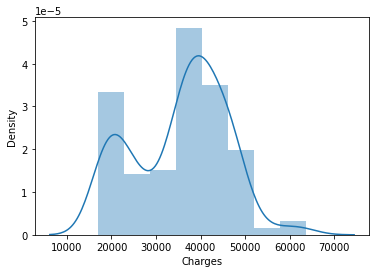

In [28]:
fig = sns.distplot(c3['charges'], axlabel='Charges', kde=True)
plt.show()

C:\Users\Mutiara Saviera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


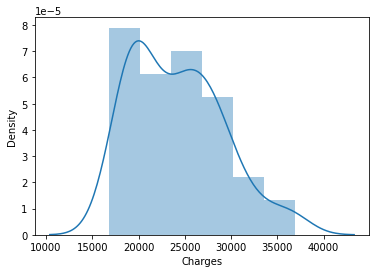

In [29]:
fig = sns.distplot(c4['charges'], axlabel='Charges', kde=True)
plt.show()

# Correlation of Variables

In [30]:
df = df.replace({'sex': {'female': 1,'male': 0}})
df = df.replace({'smoker': {'yes': 1,'no': 0}})
df = df.replace({'region': {'southeast': 0,'southwest': 1,'northeast': 2,'northwest': 3}})

<AxesSubplot:>

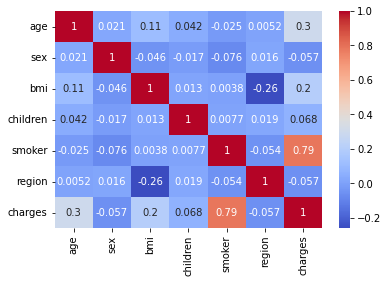

In [31]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

There is a signifant correlation of smoker status and charges

# Hypothesis Testing

In [32]:
# Hypothesis 1

stat, p = stats.ttest_ind(df_smoker["charges"],df_non_smoker["charges"], equal_var = False)
stat, p


(32.751887766341824, 5.88946444671698e-103)

Since p-value < 0.05, then reject H0.
It can be said that charges of smoker are higher than charges of non smoker (with significancy level at 5%)

In [33]:
# Hypothesis 2

bmi_lebih= df[df["bmi"] > 25]
bmi_kurang= df[df["bmi"] < 25]

stat, p = stats.ttest_ind(bmi_lebih["charges"],bmi_kurang["charges"], equal_var = False)
stat, p


(5.929878344096734, 5.080897303161378e-09)

Since p-value < 0.05, then reject H0.
It can be said that charges of people who have BMI more than more than 25 are higher than charges people who have BMI less than more than 25 (with significancy level at 5%)

In [34]:
# Hypothesis 3
# Charges of male more than female

df_female = df[(df["sex"] == 1)]
df_male = df[(df["sex"] == 0)]

stat, p = stats.ttest_ind(df_male["charges"],df_female["charges"], equal_var = False)
stat, p

(2.1008878232359565, 0.035841014956016645)

Since p-value < 0.05, then reject H0.
It can be said that charges of male are higher than charges of female (with significancy level at 5%)